<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/PuntoExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

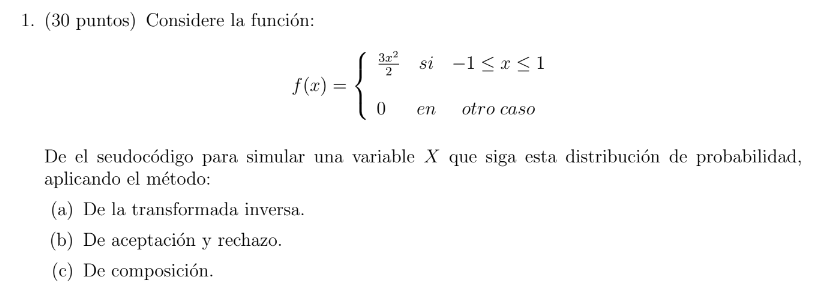

Solución:

a)

Nota: Se usa "np.cbrt" que es una función de numpy que calcula la raíz cúbica de manera correcta para valores tanto positivos como negativos. Esto asegura que la simetría se mantenga en el histograma.

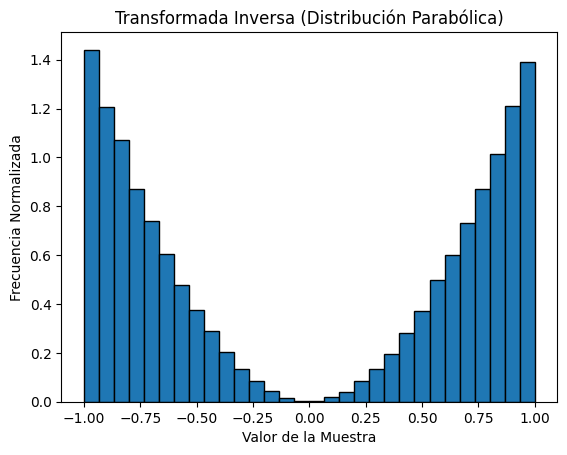

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def transformada_inversa():
    u = np.random.uniform(0, 1)
    # Transformar u en el rango [-1, 1] y aplicar la raíz cúbica correctamente
    x = np.cbrt(2 * u - 1)
    return x

# Generar muestras
n_samples = 100000
samples_inversa = np.array([transformada_inversa() for _ in range(n_samples)])

# Mostrar histograma
plt.hist(samples_inversa, bins=30, edgecolor='black',density=True)
plt.title('Transformada Inversa (Distribución Parabólica)')
plt.xlabel('Valor de la Muestra')
plt.ylabel('Frecuencia Normalizada')
plt.show()

b)

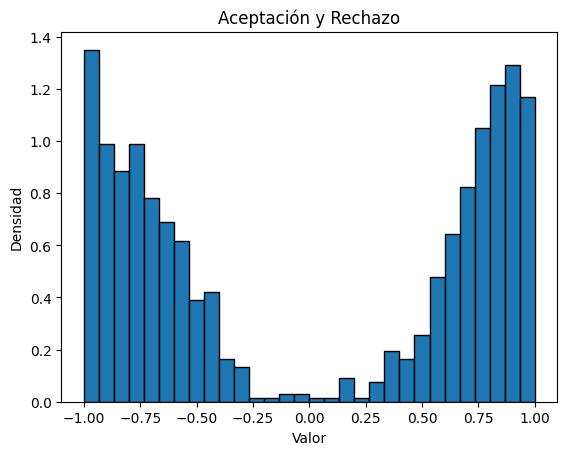

In [24]:
import numpy as np

def f(x):
    return 1.5 * x**2

def g(x):
    return 0.5  # Uniforme en [-1, 1]

def aceptar_rechazar(n):
    muestras = []
    M = 3
    while len(muestras) < n:
        X = np.random.uniform(-1, 1)
        U = np.random.uniform(0, 1)

        if U <= f(X) / (M * g(X)):
            muestras.append(X)

    return muestras

# Generar una muestra de tamaño n
n = 1000
muestra = aceptar_rechazar(n)

# Imprimir los primeros 10 valores generados
#print(muestra[:10])

# Graficar el histograma de los valores generados
import matplotlib.pyplot as plt

plt.hist(muestra, bins=30, edgecolor='black', density=True)
plt.title('Aceptación y Rechazo')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()


c)

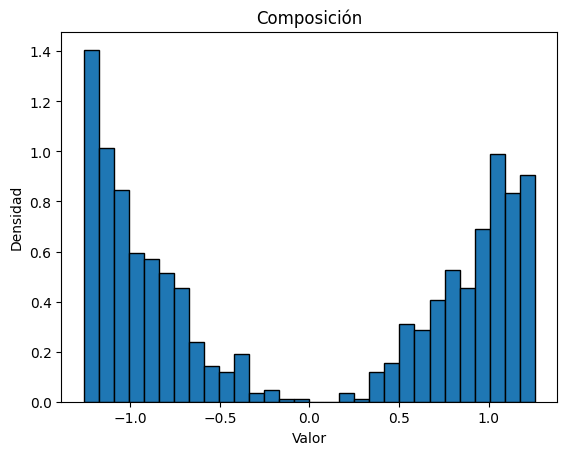

In [23]:
import numpy as np

def generar_muestra_composicion(n):
    muestras = []
    for _ in range(n):
        U = np.random.uniform(0, 1)
        V = np.random.uniform(0, 1)

        if V < 0.5:
            # Generar usando f1(x) en [0, 1]
            X = (2 * U) ** (1/3)
        else:
            # Generar usando f2(x) en [-1, 0]
            X = -((2 * U) ** (1/3))

        muestras.append(X)

    return muestras

# Generar una muestra de tamaño n
n = 1000
muestra = generar_muestra_composicion(n)

# Imprimir los primeros 10 valores generados
#print(muestra[:10])

# Graficar el histograma de los valores generados
import matplotlib.pyplot as plt

plt.hist(muestra, bins=30, edgecolor='black', density=True)
plt.title('Composición')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

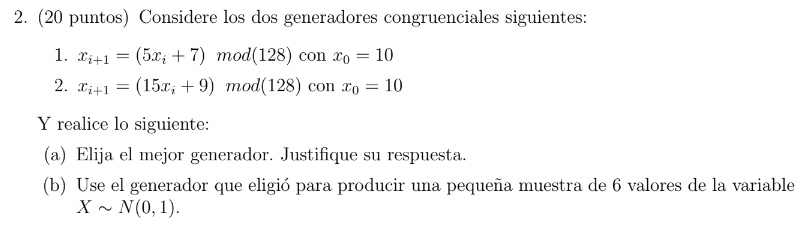

Solución:


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def generador_congruencial_1(x0, n):
    a, c, m = 5, 7, 128
    x = x0
    sequence = []
    for _ in range(n):
        x = (a * x + c) % m
        sequence.append(x)
    return sequence

def generador_congruencial_2(x0, n):
    a, c, m = 15, 9, 128
    x = x0
    sequence = []
    for _ in range(n):
        x = (a * x + c) % m
        sequence.append(x)
    return sequence

# Función para determinar el período de un generador
def determinar_periodo(seq):
    for i in range(1, len(seq)):
        if seq[i] == seq[0]:
            return i
    return len(seq)

# Generar secuencias con ambos generadores
x0 = 10
n = 128  # longitud de la secuencia para detectar el periodo

seq1 = generador_congruencial_1(x0, n)
seq2 = generador_congruencial_2(x0, n)

# Determinar períodos
periodo1 = determinar_periodo(seq1)
periodo2 = determinar_periodo(seq2)

a)

In [21]:
print("Secuencia del Generador 1:", seq1)
print("Periodo del Generador 1:", periodo1)
print("Secuencia del Generador 2:", seq2)
print("Periodo del Generador 2:", periodo2)

# Selección del mejor generador
if periodo1 == 128:
    selected_generator = generador_congruencial_1
    print("Se elige el Generador 1 porque tiene período completo.")
else:
    selected_generator = generador_congruencial_2
    print("Se elige el Generador 2 porque tiene período completo.")
# Imprimir los valores uniformes generados
#print("\nValores uniformes generados:")
#print(uniform_numbers)
# Crear una tabla de la secuencia del generador 1 y los valores uniformes
print("\nTabla de valores de la secuencia del Generador 1 y valores uniformes:")
print("x_i+1\t\tu_i=x_i/128")
for i in range(min(10, len(seq1))):
    print(f"{seq1[i]}\t\t{seq1[i] / 128:.6f}")



Secuencia del Generador 1: [57, 36, 59, 46, 109, 40, 79, 18, 97, 108, 35, 54, 21, 112, 55, 26, 9, 52, 11, 62, 61, 56, 31, 34, 49, 124, 115, 70, 101, 0, 7, 42, 89, 68, 91, 78, 13, 72, 111, 50, 1, 12, 67, 86, 53, 16, 87, 58, 41, 84, 43, 94, 93, 88, 63, 66, 81, 28, 19, 102, 5, 32, 39, 74, 121, 100, 123, 110, 45, 104, 15, 82, 33, 44, 99, 118, 85, 48, 119, 90, 73, 116, 75, 126, 125, 120, 95, 98, 113, 60, 51, 6, 37, 64, 71, 106, 25, 4, 27, 14, 77, 8, 47, 114, 65, 76, 3, 22, 117, 80, 23, 122, 105, 20, 107, 30, 29, 24, 127, 2, 17, 92, 83, 38, 69, 96, 103, 10]
Periodo del Generador 1: 128
Secuencia del Generador 2: [31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15, 106, 63, 58, 111, 10, 31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15, 106, 63, 58, 111, 10, 31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15, 106, 63, 58, 111, 10, 31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15, 106, 63, 58, 111, 10, 31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15, 106, 63, 58, 111, 10, 31, 90, 79, 42, 127, 122, 47, 74, 95, 26, 15,

b)


Valores generados de N(0,1) usando Box-Muller:
U1		U2		X		Y
0.445312	0.281250	-0.248153	1.247549
0.460938	0.359375	-0.789555	0.962075
0.851562	0.312500	-0.216940	0.523738


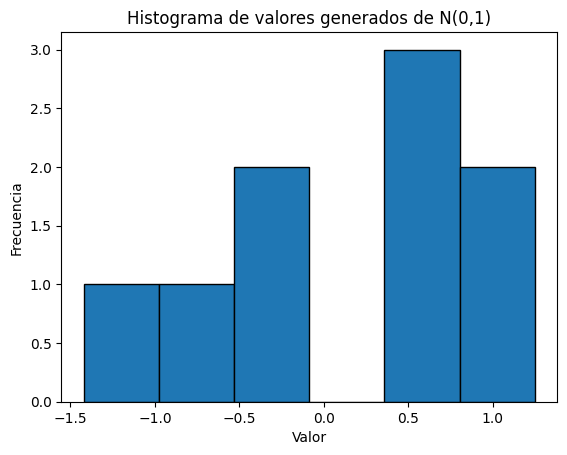

In [22]:
# Generar una muestra de 6 valores para una distribución normal estándar
# Usamos el generador seleccionado para simular números aleatorios uniformes
def box_muller_transform(u1, u2):
    r = np.sqrt(-2 * np.log(u1))
    theta = 2 * np.pi * u2
    z1 = r * np.cos(theta)
    z2 = r * np.sin(theta)
    return z1, z2

# Generar 6 valores de N(0,1)
n_samples = 6
random_numbers = selected_generator(x0, n_samples * 2)
uniform_numbers = [x / 128 for x in random_numbers]
# Aplicar Box-Muller
normal_samples = []
u1_u2_pairs = []
for i in range(0, len(uniform_numbers), 2):
    u1, u2 = uniform_numbers[i], uniform_numbers[i + 1]
    z1, z2 = box_muller_transform(u1, u2)
    normal_samples.append(z1)
    if len(normal_samples) < n_samples:
        normal_samples.append(z2)
    u1_u2_pairs.append((u1, u2))
# Imprimir los valores en columnas U1, U2, X e Y
print("\nValores generados de N(0,1) usando Box-Muller:")
print("U1\t\tU2\t\tX\t\tY")
for i in range(n_samples // 2):
    u1, u2 = u1_u2_pairs[i]
    x, y = normal_samples[2 * i], normal_samples[2 * i + 1]
    print(f"{u1:.6f}\t{u2:.6f}\t{x:.6f}\t{y:.6f}")

# Graficar el histograma de los valores generados
plt.hist(normal_samples, bins=6, edgecolor='black')
plt.title('Histograma de valores generados de N(0,1)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()
